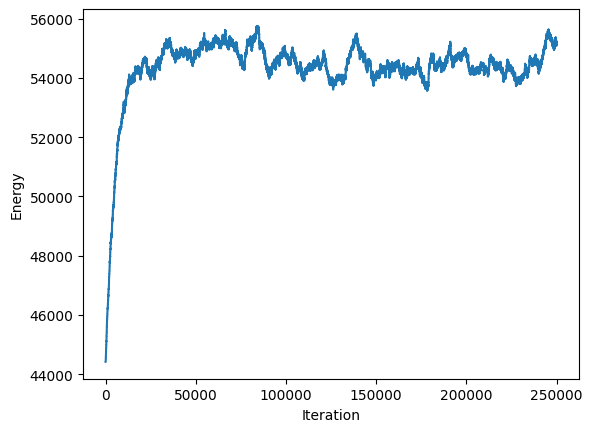

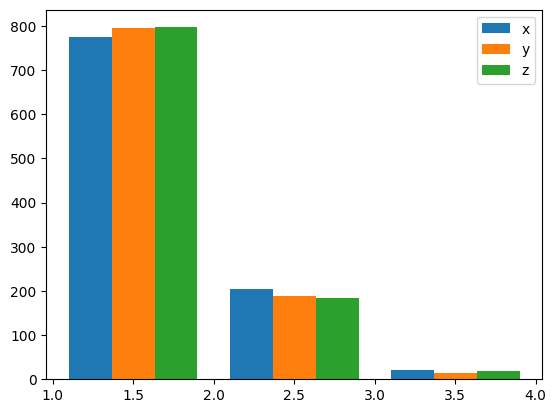

In [10]:
%matplotlib inline
from random import random, randrange
from math import exp,pi
import numpy as np
import matplotlib.pyplot as plt

T = 10.0
N = 1_000
steps = 250_000

# Create a 2D array to store the quantum numbers
n = np.ones([N,3], int)

# Main loop
eplot = []
E = 3*pi*pi/2 * (n ** 2).sum()
for k in range(steps):
    # Choose the particle and the move
    i, j = randrange(N), randrange(3)
    
    # Determine a random move set and associate change in energy
    n_i = n[i,j]
    change = 1 if random() < 0.5 else -1
    delta_e = (pi*pi/2)*(2*n_i*change + 1)

    # Decide whether to accept the move. If so, change the state and total energy
    p = exp(-delta_e/T) if delta_e > 0 else 1.0
    if n_i + change >= 1 and random() < p:
        n[i,j] += change
        E += delta_e

    eplot.append(E)

# Make some graphs
plt.plot(eplot)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

plt.hist(n, 3, label=['x','y','z'])
plt.legend(loc='best')
plt.show()